In [1]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

## Lecture 9 ##

## Visualization Review: Welcome Survey ##

In [2]:
survey = Table.read_table('welcome_survey_v1.csv')
survey

Extraversion,Number of textees,Hours of sleep,Handedness,Pant leg,Sleep position
4,6,4,Both,I don't know,On your back
8,6,7,Both,I don't know,On your back
9,6,7,Both,I don't know,On your back
2,3,6.75,Left-handed,I don't know,On your back
7,10,7,Left-handed,I don't know,On your back
8,50,8,Left-handed,I don't know,On your back
4,5,10,Left-handed,I don't know,On your back
7,2,5,Right-handed,I don't know,On your back
3,7,5,Right-handed,I don't know,On your back
6,8,5.5,Right-handed,I don't know,On your back


### Categorical Bar Charts

In [4]:
handedness = survey.group('Handedness')
handedness

Handedness,count
Both,18
Left-handed,100
Right-handed,1209


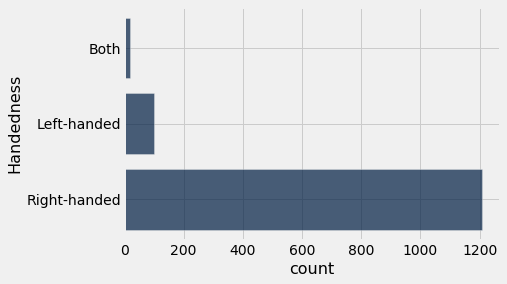

In [5]:
handedness.barh('Handedness')

### Numerical Histograms

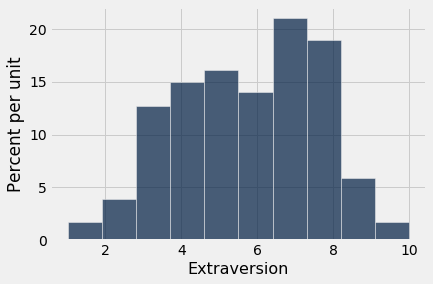

In [6]:
survey.hist('Extraversion')

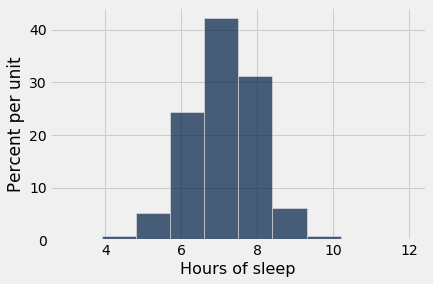

In [7]:
survey.hist('Hours of sleep')

In [8]:
max(survey.column('Hours of sleep'))

12.0

In [9]:
sleep_bins = np.arange(4,12,0.5)

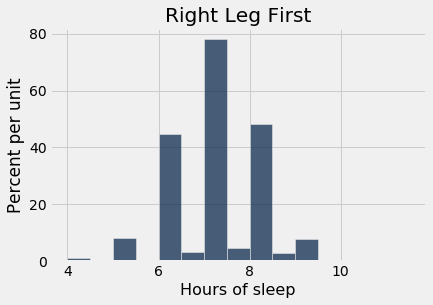

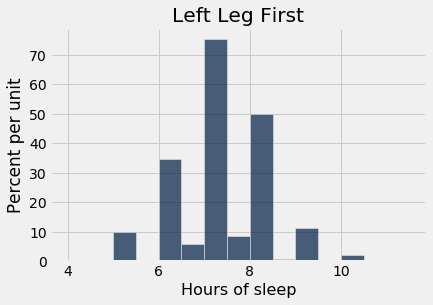

In [10]:
survey.where(
    'Pant leg',are.containing('Right')).hist('Hours of sleep', bins=sleep_bins)
plots.title('Right Leg First');

survey.where(
    'Pant leg',are.containing('Left')).hist('Hours of sleep', bins=sleep_bins)
plots.title('Left Leg First');

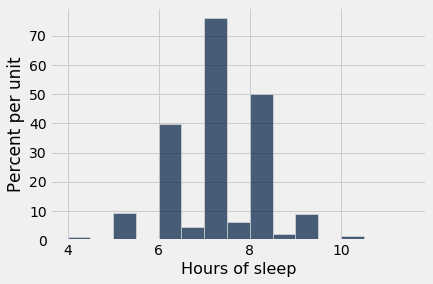

In [11]:
survey.hist('Hours of sleep', bins=sleep_bins)

In [12]:
survey.bin('Hours of sleep', bins=make_array(0,8,15))

bin,Hours of sleep count
0,910
8,417
15,0


In [13]:
417/(417 + 915) * 100

31.306306306306308

## Histogram Review: Heights and Heredity ##

In [14]:
galton = Table.read_table('galton.csv')
galton

family,father,mother,midparentHeight,children,childNum,gender,childHeight
1,78.5,67,75.43,4,1,male,73.2
1,78.5,67,75.43,4,2,female,69.2
1,78.5,67,75.43,4,3,female,69
1,78.5,67,75.43,4,4,female,69
2,75.5,66.5,73.66,4,1,male,73.5
2,75.5,66.5,73.66,4,2,male,72.5
2,75.5,66.5,73.66,4,3,female,65.5
2,75.5,66.5,73.66,4,4,female,65.5
3,75,64,72.06,2,1,male,71
3,75,64,72.06,2,2,female,68


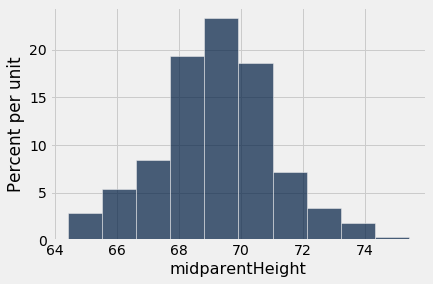

In [15]:
galton.hist('midparentHeight')

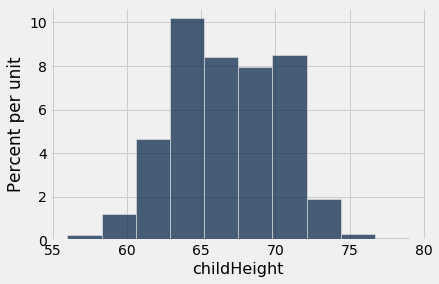

In [16]:
galton.hist('childHeight')

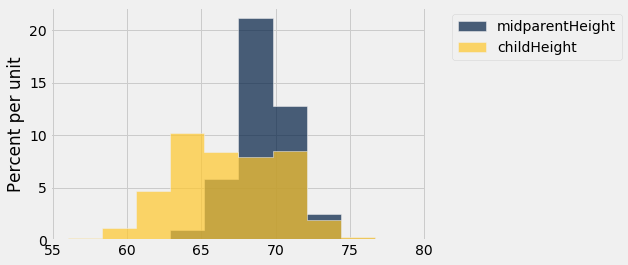

In [17]:
galton.hist('midparentHeight', 'childHeight')

## Functions ##

In [18]:
def triple(x):
    return 3 * x

In [19]:
triple(3)

9

In [20]:
num = 4

In [21]:
triple(num)

12

In [22]:
triple(num * 5)

60

### Note About Scopes

In [23]:
x

NameError: name 'x' is not defined

In [24]:
x = 5

In [25]:
triple(2 * x)

30

In [26]:
x

5

### Type Agnostic

In [27]:
triple('ha')

'hahaha'

In [28]:
triple(np.arange(4))

array([0, 3, 6, 9])

### Discussion Question

In [29]:
def percent_of_total(s):
    return np.round(s / sum(s) * 100, 2)

In [30]:
percent_of_total(make_array(1,2,3,4))

array([10., 20., 30., 40.])

In [31]:
percent_of_total(make_array(1, 213, 38))

array([ 0.4 , 84.52, 15.08])

### Multiple Arguments

$ h^2 = x^2 + y^2 \hspace{20 pt} => \hspace{20 pt} h = \sqrt{ x^2 + y^2 } $

In [32]:
def hypotenuse(x,y):
    hypot_squared = (x ** 2 + y ** 2)
    return hypot_squared ** 0.5

In [33]:
hypotenuse(9, 12)

15.0

In [34]:
hypotenuse(2, 2)

2.8284271247461903

## Apply ##

In [35]:
ages = Table().with_columns(
    'Person', make_array('Jim', 'Pam', 'Michael', 'Creed'),
    'Birth Year', make_array(1985, 1988, 1967, 1904)
)
ages

Person,Birth Year
Jim,1985
Pam,1988
Michael,1967
Creed,1904


In [36]:
def cap_at_1980(x):
    return min(x, 1980)

In [37]:
cap_at_1980(1975)

1975

In [38]:
cap_at_1980(1991)

1980

In [39]:
ages.apply(cap_at_1980, 'Birth Year')

array([1980, 1980, 1967, 1904])

In [40]:
def name_and_age(name, year):
    age = 2019 - year
    return name + ' is ' + str(age)

In [41]:
ages.apply(name_and_age, 'Person', 'Birth Year')

array(['Jim is 34', 'Pam is 31', 'Michael is 52', 'Creed is 115'],
      dtype='<U13')